In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as utils
import torch.utils.data as td
torch.manual_seed(1234)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
#Custom Model
class IrisNet1(nn.Module):

    def __init__(self,input_size,h1,h2,output):
        super(IrisNet1, self).__init__()
   
        self.fc1   = nn.Linear(input_size, h1)
        self.relu1 = nn.ReLU()
        self.fc2   = nn.Linear(h1, h2)
        self.relu2 = nn.ReLU()
        self.fc3   = nn.Linear(h2,output)    

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        
        return out  

In [3]:
# Hyperparameters

learning_rate = 0.01
learning_momentum = 0.9
input_size=4
h1=6
h2=4
output=3
epochs = 20

# Create the Model

model = IrisNet1(input_size,h1,h2,output)

In [4]:
#Choose Optimizer and Loss function

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=learning_momentum)

In [5]:
#load dataset
iris=load_iris()
x,y=iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=1)

In [6]:
display(x_train.shape)
display(x_test.shape)
display(x_val.shape)
display(y_train.shape)
display(y_test.shape)
display(y_val.shape)

(120, 4)

(15, 4)

(15, 4)

(120,)

(15,)

(15,)

In [7]:
# Create DataLoaders

# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = utils.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=10,shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = utils.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=10, shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
val_x = torch.Tensor(x_val).float()
val_y = torch.Tensor(y_val).long()
val_ds = utils.TensorDataset(val_x,val_y)
val_loader = td.DataLoader(val_ds, batch_size=10, shuffle=True, num_workers=1)

print("Loaders ready")

Loaders ready


In [8]:
# Function to Train the model

def train(model, data_loader, data_loader1, criterion,optimizer):
    model.train()
    train_loss = 0
    valid_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, target)
        train_loss += loss.item()
        # backpropagate
        loss.backward()
        optimizer.step()
        #train_loss += loss.item()
## evaluation part 
    model.eval()
    for batch1, tensor1 in enumerate(data_loader1):
        data1, target1 = tensor1
        output = model(data1)
        loss1 = criterion(output, target1)
        valid_loss += loss1.item()
        
        
    #Return loss
    avg_loss = train_loss / len(data_loader.dataset)
    avg_loss1 = valid_loss/len(data_loader1.dataset)
    return avg_loss, avg_loss1

In [9]:
len(val_loader.dataset)

15

In [10]:
def test(model, data_loader,criterion):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for batch, tensor in enumerate(data_loader):
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += criterion(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # return validation loss and prediction accuracy for the epoch
    avg_accuracy = correct / len(data_loader.dataset)
    avg_loss = test_loss / len(data_loader.dataset)
    
    return avg_loss, avg_accuracy

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
#Train the model - track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []


# Train over set epochs

for epoch in range(1, epochs + 1):
    
    # Feed the training data into the model to optimize the weights
    train_loss,valid_loss = train(model, train_loader,val_loader, criterion, optimizer)
    
    # Log the metrcs for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(valid_loss)
    
    # Print stats for every 10th epoch so we can see training progress
    if (epoch) % 1 == 0:
        print('Epoch {:d}: Training loss= {:.4f}, Validation loss= {:.4f}'.format(epoch, train_loss, valid_loss))

Epoch 1: Training loss= 0.1090, Validation loss= 0.1383
Epoch 2: Training loss= 0.1003, Validation loss= 0.1334
Epoch 3: Training loss= 0.0885, Validation loss= 0.1158
Epoch 4: Training loss= 0.0718, Validation loss= 0.1043
Epoch 5: Training loss= 0.0564, Validation loss= 0.0855
Epoch 6: Training loss= 0.0434, Validation loss= 0.0604
Epoch 7: Training loss= 0.0396, Validation loss= 0.0802
Epoch 8: Training loss= 0.0382, Validation loss= 0.0910
Epoch 9: Training loss= 0.0330, Validation loss= 0.0893
Epoch 10: Training loss= 0.0349, Validation loss= 0.1335
Epoch 11: Training loss= 0.0446, Validation loss= 0.0499
Epoch 12: Training loss= 0.0336, Validation loss= 0.0404
Epoch 13: Training loss= 0.0227, Validation loss= 0.0672
Epoch 14: Training loss= 0.0180, Validation loss= 0.0699
Epoch 15: Training loss= 0.0239, Validation loss= 0.0331
Epoch 16: Training loss= 0.0131, Validation loss= 0.0299
Epoch 17: Training loss= 0.0192, Validation loss= 0.0859
Epoch 18: Training loss= 0.0203, Validat

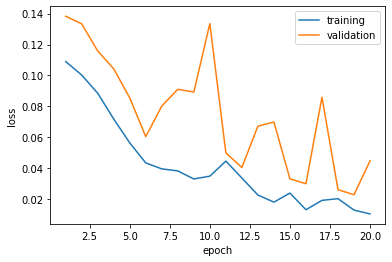

In [19]:
#Training and Validation Loss
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [14]:
# Learned Weights and Biases
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.47102076 -0.09810144 -0.24015582 -0.13335866]
 [-0.44169927  0.20064473 -0.4482026  -0.03186077]
 [-0.08748516 -0.38836077  1.2448198   0.77154434]
 [ 1.1279426   0.93006086 -1.3676248  -0.7598766 ]
 [-0.21632504  0.15673041 -0.26124418  0.2312845 ]
 [ 0.10122263 -0.19567156 -0.24524784  0.12936187]]
fc1.bias 
 [ 0.46651107  0.23994923 -0.21087718  0.30360585  0.28419435 -0.34750378]
fc2.weight 
 [[ 0.13572168 -0.13527468  1.1995199  -0.29329512  0.02018687  0.13785785]
 [ 0.28056026 -0.06000572  0.729051   -0.8485891  -0.0728226  -0.40709534]
 [ 0.03381929  0.11585277 -0.14578955  0.37877727 -0.06618074 -0.3547628 ]
 [ 0.31342566  0.25171095 -0.26952288  1.278866    0.1501211   0.21706152]]
fc2.bias 
 [ 0.38822192 -0.31002    -0.24988884  0.0566116 ]
fc3.weight 
 [[-1.1007733  -0.21036887  0.10434131  0.80024624]
 [ 0.614455   -0.83134896 -0.18486698  0.22241504]
 [ 0.8842761   0.43568888 -0.2822579  -0.9341403 ]]
fc3.bias 
 [ 0.06060933  0.24479653 -1.0449203 ]


In [15]:
test_loss, accuracy = test(model, test_loader,criterion)

In [16]:
 print('Test loss= {:.4f}, Accuracy={:.4%}'.format(test_loss, accuracy))

Test loss= 0.0077, Accuracy=100.0000%


Accuracy = 100.0%


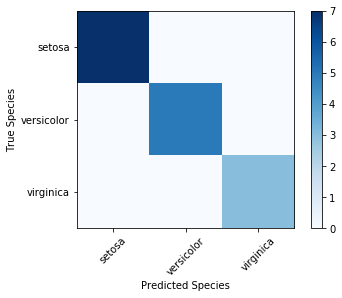

array([[7, 0, 0],
       [0, 5, 0],
       [0, 0, 3]], dtype=int64)

In [17]:
#Evaluate Model Performance 
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
k=accuracy_score(y_test, predicted.numpy())
print('Accuracy = '+str(k*100) +'%')
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()
cm

In [18]:
x_new = [[7,3.2,4.7,1.4]]
print ('New sample: {}'.format(x_new[0]))

model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',iris.target_names[predicted.item()])

New sample: [7, 3.2, 4.7, 1.4]
Prediction: versicolor
